In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
%matplotlib inline

In [8]:
train_set = pd.read_csv("C:/Users/hp/Desktop/fashion-mnist_train.csv")
test_set = pd.read_csv("C:/Users/hp/Desktop/fashion-mnist_test.csv")


In [9]:
from sklearn.model_selection import train_test_split

X = np.array(train_set.iloc[:, 1:])
y = to_categorical(np.array(train_set.iloc[:, 0]))

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

print( x_train.shape,  y_train.shape, x_val.shape, y_val.shape)


(48000, 784) (48000, 10) (12000, 784) (12000, 10)


In [10]:
x_test = np.array(test_set.iloc[:, 1:])
y_test = to_categorical(np.array(test_set.iloc[:, 0]))

print(x_test.shape, y_test.shape)

(10000, 784) (10000, 10)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


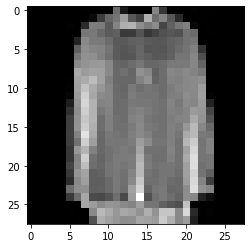

In [11]:
plt.imshow(x_test[7].reshape(28,28), cmap='gray', interpolation='none')
print(y_test[7])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


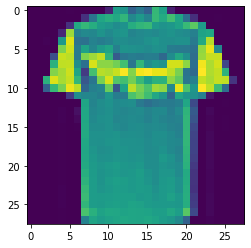

In [12]:
plt.imshow(x_test[3096].reshape(28,28), cmap='viridis', interpolation='none')
print(y_test[3096])

In [13]:
input_num_units = 784
hidden_num_units = 50
output_num_units = 10


batch_size = 256

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_val /= 255.0
x_train /= 255.0
x_test /= 255.0

In [ ]:
model = Sequential()

model.add(Dense(input_dim = 784, activation='relu',units=500))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, activation='relu',units=500))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, activation='relu',units=500))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, activation='relu',units=500))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, activation='relu',units=500))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, activation='relu',units=500))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, activation='relu',units=500))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, activation='relu',units=500))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, activation='relu',units=250))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 250 , activation='relu',units=250))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 250, activation='relu',units=250))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 250, activation='relu',units=100))
model.add(Dropout(0.25))

model.add(Dense(input_dim = 100, activation='softmax',units=10))


model.compile(optimizer= 'adam' , loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 25, batch_size = 256, validation_data=(x_val, y_val))

Epoch 1/25
188/188 [==============================] - 91s 137ms/step - loss: 0.3879 - accuracy: 0.1178 - val_loss: 0.2026 - val_accuracy: 0.4153
Epoch 2/25
188/188 [==============================] - 21s 111ms/step - loss: 0.1888 - accuracy: 0.5226 - val_loss: 0.1056 - val_accuracy: 0.7287
Epoch 3/25
188/188 [==============================] - 21s 113ms/step - loss: 0.1160 - accuracy: 0.7241 - val_loss: 0.0994 - val_accuracy: 0.7571
Epoch 4/25
 47/188 [======>.......................] - ETA: 15s - loss: 0.1060 - accuracy: 0.7400

In [ ]:
model.summary()